In [1]:

import numpy as np
import pandas as pd 
import re
import pandas as pd
import numpy as np
import unicodedata
import sys
import datetime
import time
import MeCab
import collections
import mojimoji
import numpy as np
from pprint import pprint


from pprint import pprint
from scipy import spatial

import fasttext 
import fasttext.util
import re

In [2]:
def meishi(text):
    
    
    stop_words= [',','｡','.','右','左','*','(',')','委任',':','。','、',',','.','+']

    mecab = MeCab.Tagger(r"-d /var/lib/mecab/dic/ipadic-utf8/ -u dic/MANBYO_201907_Dic-utf8.dic")
    result = mecab.parse(text)
    lines = result.split('\n')
    nounAndVerb = []#「名詞」と「動詞」を格納するリスト
    for line in lines:
        feature = line.split('\t')
        if len(feature) == 2: #'EOS'と''を省く
            info = feature[1].split(',')
            hinshi = info[0]
            if hinshi in ('名詞', '動詞'):
                nounAndVerb.append(feature[0])
    words = []
    for word in nounAndVerb:
        if (re.compile(r'^.*[0-9]+.*$').fullmatch(word) is not None): # 数字が含まれるものは除外
            continue
        if word in stop_words: # ストップワードに含まれるものは除外
            continue
        if len(word) < 1:#  1文字、0文字（空文字）は除外
            continue
        words.append(word)
    return(words)
    
def meishi2(text):
    stop_words= [',','｡','.','右','左','*','(',')','委任',':','。','、',',','.','+']
    
    words = meishi(text)
    words = ' '.join(words)
    return(words)
    

In [3]:
def wakatis(Str):
    
    stop_words= [',','｡','.','右','左','*','(',')','委任','/',':','。','、',',','.','+','→']
    import MeCab
    tagger = MeCab.Tagger(r"-d /var/lib/mecab/dic/ipadic-utf8/ -u dic/MANBYO_201907_Dic-utf8.dic -Owakati")              
    result = tagger.parse(Str).split()
    words = []
    stop_words = stop_words
    for word in result:
        if (re.compile(r'^.*[0-9]+.*$').fullmatch(word) is not None): # 数字が含まれるものは除外
            continue
        if word in stop_words: # ストップワードに含まれるものは除外
            continue
        if len(word) < 1: #  1文字、0文字（空文字）は除外
            continue
        words.append(word)
    return words

def wakati(Str):
    import MeCab
    
    stop_words=  [',','｡','.','右','左','*','(',')','委任',':','。','、',',','.','+']
    tagger = MeCab.Tagger(r"-d /var/lib/mecab/dic/ipadic-utf8/ -u dic/MANBYO_201907_Dic-utf8.dic -Owakati")              
    result = tagger.parse(Str).split()
    words = []
    stop_words = stop_words
    for word in result:
        if (re.compile(r'^.*[0-9]+.*$').fullmatch(word) is not None): # 数字が含まれるものは除外
            continue
        if word in stop_words: # ストップワードに含まれるものは除外
            continue
        if len(word) < 1: #  1文字、0文字（空文字）は除外
            continue
        words.append(word)
    words = ' '.join(words)
    return words


In [4]:
df=pd.read_csv("CorrectedDatanew.csv")

In [5]:
df= df[:5]
df

,year,section,label,position,purpose,diagnosis,男,女,単純,造影
0,46,脳内,H1,胸部委任,脳梗塞原因検査中の方です。恐縮ですが、大動脈プラークイメージおよび、頚部動脈プラークイメージ...,アテローム血栓性脳梗塞・急性期,1,0,1,0
1,72,脳内,H1,胸部委任,動脈硬化リスクの高い方。無症候性脳梗塞の繰り返しのためAortaimageも含め、弓部から頚...,冠動脈バイパス術後 左鎖骨下動脈狭窄症,1,0,1,0
2,72,心外,H1,胸部委任,術前精査,鎖骨下動脈瘤,0,1,1,0
3,48,腎内,A2,下肢血管,糖尿病、血液透析中の患者さん。両下肢の歩行時痺れ痛み。間欠性跛行あり。ASOの精査目的,下肢閉塞性動脈硬化症,1,0,1,0
4,60,皮膚,A2,下肢血管,上記で加療中です。足趾潰瘍と色調不良の悪化あります。血管の状態悪化ありますでしょうか。,四肢バージャー病,0,1,1,0


In [16]:
df["meishi"] = df["diagnosis"].map(meishi)
df["meishi2"] = df["diagnosis"].map(meishi2)
df["wakachi"] = df["diagnosis"].map(wakatis)


df

,year,section,label,position,purpose,diagnosis,男,女,単純,造影,meishi,meishi2,wakachi
0,46,脳内,H1,胸部委任,脳梗塞原因検査中の方です。恐縮ですが、大動脈プラークイメージおよび、頚部動脈プラークイメージ...,アテローム血栓性脳梗塞・急性期,1,0,1,0,"[アテローム, 血栓性, 脳梗塞, 急性期]",アテローム 血栓性 脳梗塞 急性期,"[アテローム, 血栓性, 脳梗塞, ・, 急性期]"
1,72,脳内,H1,胸部委任,動脈硬化リスクの高い方。無症候性脳梗塞の繰り返しのためAortaimageも含め、弓部から頚...,冠動脈バイパス術後 左鎖骨下動脈狭窄症,1,0,1,0,"[冠動脈バイパス術後, 左鎖骨下動脈狭窄症]",冠動脈バイパス術後 左鎖骨下動脈狭窄症,"[冠動脈バイパス術後, 左鎖骨下動脈狭窄症]"
2,72,心外,H1,胸部委任,術前精査,鎖骨下動脈瘤,0,1,1,0,[鎖骨下動脈瘤],鎖骨下動脈瘤,[鎖骨下動脈瘤]
3,48,腎内,A2,下肢血管,糖尿病、血液透析中の患者さん。両下肢の歩行時痺れ痛み。間欠性跛行あり。ASOの精査目的,下肢閉塞性動脈硬化症,1,0,1,0,"[下肢, 閉塞性, 動脈硬化症]",下肢 閉塞性 動脈硬化症,"[下肢, 閉塞性, 動脈硬化症]"
4,60,皮膚,A2,下肢血管,上記で加療中です。足趾潰瘍と色調不良の悪化あります。血管の状態悪化ありますでしょうか。,四肢バージャー病,0,1,1,0,"[四肢, バージャー病]",四肢 バージャー病,"[四肢, バージャー病]"


In [14]:
def pw(doc):
    for word in doc:
            print(word)
            print('lllll')

In [18]:
#ftはリストで
df['wakachi'].map(pw)

アテローム
lllll
血栓性
lllll
脳梗塞
lllll
・
lllll
急性期
lllll
冠動脈バイパス術後
lllll
左鎖骨下動脈狭窄症
lllll
鎖骨下動脈瘤
lllll
下肢
lllll
閉塞性
lllll
動脈硬化症
lllll
四肢
lllll
バージャー病
lllll


0    None
1    None
2    None
3    None
4    None
Name: wakachi, dtype: object

In [19]:
class FastText_Vectrizer:
    def __init__(self, model):
        self.ft = fasttext.load_model(model)
        
    def Vectrizer(self, wordlist):
        #平均ベクトル出力
        veclists = [] # 単語ベクトル出力
        for word in wordlist:
            print(word)
            print('JJJJJ')
            W = self.ft[word]
            veclists.append(np.array(W,dtype='float16'))
        doc_vec=np.array(veclists).mean(axis=0)
        
        return   (doc_vec)   

In [20]:
FT=FastText_Vectrizer("../data/model/fasttext_meishi_model_100.bin")
Tovec = FT.Vectrizer
# new_diagnosis（名詞群）をベクトル化し平均をdfに追加
df_vec = df['wakachi'].apply(Tovec)
df_vec

アテローム
JJJJJ
血栓性
JJJJJ
脳梗塞
JJJJJ
・
JJJJJ
急性期
JJJJJ
冠動脈バイパス術後
JJJJJ
左鎖骨下動脈狭窄症
JJJJJ
鎖骨下動脈瘤
JJJJJ
下肢
JJJJJ
閉塞性
JJJJJ
動脈硬化症
JJJJJ
四肢
JJJJJ
バージャー病
JJJJJ


0    [0.3015, 0.555, 0.4614, -0.2793, 0.1189, 0.034...
1    [0.329, 0.593, 0.4824, -0.5957, -0.04703, 0.00...
2    [0.2888, 0.3384, 0.4158, -0.505, -0.1602, 0.11...
3    [0.1619, 0.0931, 0.6074, -0.1092, 0.11456, 0.3...
4    [0.282, -0.02985, 0.2686, -0.01805, -0.266, 0....
Name: wakachi, dtype: object

In [ ]:
class FastText_Vectrizer:
    def __init__(self, model):
        self.ft = fasttext.load_model(model)
        
    def Vectrizer(self, wordlist):
        #平均ベクトル出力
        veclists = [] # 単語ベクトル出力
        for word in wordlist:
            W = self.ft[word]
            veclists.append(np.array(W,dtype='float16'))
        doc_vec=np.array(veclists).mean(axis=0)
        
        return   (doc_vec)   

    
def use_fasttext_model(df, model, path):
        # fasttextをインスタンス化
    from modules import FastText_Vectrizer
    FT=FastText_Vectrizer(model)
    Tovec = FT.Vectrizer
    # new_diagnosis（名詞群）をベクトル化し平均をdfに追加
    df_vec = df['purpose'].apply(Tovec)
    
        # カラム名を変更する
    df_vec=list(df_vec)
    num=df_vec[0].shape[0]
    col_name = ["P(f)vec"+str(i) for i in range(num)]
    df_vec=pd.DataFrame(df_vec,columns=col_name)
    df_ft = pd.concat([df,df_vec],axis=1)
    
        # ベクトルデータへ変換後のデータを保存
    #df_ft.to_csv("../CSVs/ft_data.csv")
    
    return df_ft


In [12]:
df["meishi"][1]

['冠動脈バイパス術後', '左鎖骨下動脈狭窄症']

In [26]:
a='SRS以前と比べてgo変化はBPASSどうでしょうか。p/o usフォローも3回お願いﾌｫﾛｰ:脳出血悪性黒色腫'
meishi2(a)

'SRS 以前 比べ go 変化 BPASS p / o us フォロー 回 お願い ﾌｫﾛｰ 脳出血 悪性黒色腫'

In [34]:
import fasttext 

ft = fasttext.load_model("../data/model/fasttext_meishi_model_100.bin")

In [35]:
def FT_vec(docs):
    
    doc_vecs=[]
    for doc in docs:
        word_vecs=[]
        for word in wakati(doc):
            print(word)
            try:
                word_vecs.append(ft[word])
            except KeyError  :   
                word_vecs.append(np.zeros(300,  dtype = float))
       
        doc_vec=np.array(word_vecs).mean(axis=0)
        doc_vecs.append(doc_vec)
    return(np.array(doc_vecs))

In [38]:
a=FT_vec(df['wakachi'])

ア
テ
ロ
ー
ム
 
血
栓
性
 
脳
梗
塞
 
・
 
急
性
期
冠
動
脈
バ
イ
パ
ス
術
後
 
左
鎖
骨
下
動
脈
狭
窄
症
鎖
骨
下
動
脈
瘤
下
肢
 
閉
塞
性
 
動
脈
硬
化
症
四
肢
 
バ
ー
ジ
ャ
ー
病


In [39]:
a

array([[ 1.76534504e-01,  1.50961965e-01,  2.22185463e-01,
        -9.86581445e-02,  3.43896635e-02,  6.71470612e-02,
        -1.43273473e-01, -1.55251130e-01, -3.27892043e-02,
        -3.42874564e-02, -7.18510002e-02,  2.36812666e-01,
        -7.98582360e-02,  3.44407022e-01,  1.07362926e-01,
         1.31902024e-01, -5.20807840e-02,  5.62535971e-02,
         1.31078601e-01,  4.16500270e-02,  1.30600646e-01,
         6.42952323e-02,  3.17076072e-02,  9.25534740e-02,
         8.87704715e-02, -3.84229034e-01,  5.50275482e-02,
         3.33579746e-03,  4.06678393e-03,  3.78957875e-02,
        -8.79190415e-02, -4.40716818e-02, -1.62849173e-01,
         3.82311016e-01, -2.19581708e-01,  2.27197353e-02,
         1.17820792e-01,  4.07908857e-02,  1.22543924e-01,
        -1.12055503e-01,  2.06262365e-01, -1.20735243e-01,
        -8.82087126e-02, -9.46512595e-02, -2.89367288e-02,
        -6.44481406e-02,  3.32651734e-02,  5.65931872e-02,
         2.11262882e-01,  6.98164031e-02,  6.50396198e-0

### 平均単語数の確認

In [ ]:
label = df['label']
diago_num = df['new_diagnosis'].map(len)
meishi_num = df['ft_purpose'].map(len)
token_num =  df['sB_purpose'].map(len)

num_df = pd.DataFrame(list(zip(label,diago_num, meishi_num,token_num)), columns = ['label','diago','p_meishi','p_token'])
num_df.discribe()

### diagnosisのみ変形

In [ ]:
df = diago(df)

In [ ]:
#保存
df.to_csv("../CSVs/data(diagnosi).csv")

### purpose（文書）の変形 
### １sentenceBERT

In [ ]:
df = pd.read_csv("../CSVs/data(diagnosi).csv")

In [5]:
model = sBERT_model("../data/model/strf_sonoisa_sentence-bert-base-ja-mean-tokens-v232.75.10")

In [6]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 75, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (dense): Dense({'in_features': 768, 'out_features': 139, 'bias': False, 'activation_function': 'torch.nn.modules.linear.Identity'})
)

In [14]:
df = use_sBERT_model(df , model, '../CSVs/sBERT_data.csv')

NameError: name 'model' is not defined

In [4]:
###作成後読み取り

df_sBERT=pd.read_csv("../CSVs/sBERT_data.csv")

df_sBERT=df_sBERT.drop(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0','Unnamed: 0.1', 'purpose', 'diagnosis','男','造影', ], axis=1)

In [5]:
df_sBERT.head()

,year,section,label,position,女,単純,new_diagnosis,Dvec0,Dvec1,Dvec2,...,P(S)vec129,P(S)vec130,P(S)vec131,P(S)vec132,P(S)vec133,P(S)vec134,P(S)vec135,P(S)vec136,P(S)vec137,P(S)vec138
0,46,脳内,H1,胸部委任,0,1,"['脳梗塞', '血栓性', 'ｱﾃﾛｰﾑ', '急性期']",0.5450,0.8726,0.7446,...,-0.081759,0.549914,-0.584746,-0.159044,0.119145,0.484705,-0.699305,0.168667,-0.172199,-0.706338
1,72,脳内,H1,胸部委任,0,1,"['術後', '左鎖骨下動脈狭窄症', 'ﾊﾞｲﾊﾟｽ', '冠動脈']",0.3496,0.3828,0.5376,...,0.381831,-0.206591,-0.230780,-0.221049,0.785830,0.194651,-0.112709,0.330984,-0.378972,-0.148635
2,72,心外,H1,胸部委任,1,1,['鎖骨下動脈瘤'],0.2888,0.3384,0.4158,...,-0.303869,-0.642478,0.234565,-0.697180,0.053161,0.015408,-0.090424,0.260176,0.069849,-0.773335
3,48,腎内,A2,下肢血管,0,1,"['下肢', '動脈硬化症', '閉塞性']",0.1619,0.0931,0.6074,...,0.513388,0.105949,-0.577218,0.331962,0.222877,-0.084044,0.274581,0.015949,0.440824,0.473394
4,60,皮膚,A2,下肢血管,1,1,"['四肢', '病', 'ﾊﾞｰｼﾞｬｰ']",0.1338,0.1987,0.1578,...,0.015797,-0.084961,0.381342,-0.218095,-0.474261,0.231522,-0.439021,0.719141,0.371222,0.346479


### purpose（文書）の変形 
### 2fasttext

In [15]:
df = pd.read_csv("../CSVs/data(diagnosi).csv")

df = use_fasttext_model(df, "../data/model/fasttext_meishi_model.bin", '../CSVs/ft_data.csv')

KeyboardInterrupt: 

In [4]:
###作成後読み取り

df_ft=pd.read_csv("../CSVs/ft_data.csv")

df_ft=df_ft.drop(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0','Unnamed: 0.1', 'purpose', 'diagnosis','男','造影',], axis=1)

In [6]:
df_ft.head()

NameError: name 'df_ft' is not defined

### データ選択と変形

In [7]:
#####################################


#df = df_ft
df = df_sBERT


########################################

In [8]:
# カテゴリカルデータをラベルエンコード
from sklearn import preprocessing
lbl_s = preprocessing.LabelEncoder()
lbl_s.fit(df['section'])
lbl_section = lbl_s.transform(df['section'])

lbl_p = preprocessing.LabelEncoder()
lbl_p.fit(df['position'])
lbl_position = lbl_p.transform(df['position'])

lbl_l = preprocessing.LabelEncoder()
lbl_l.fit(df['label'])
lbl_label = lbl_l.transform(df['label'])




y = lbl_label
X = df.drop(['label', 'section', 'position', 'new_diagnosis'], axis=1)
X['sec_lbl'] = lbl_section
X['pos_lbl'] = lbl_position
#X['label_lbl'] = lbl_label


print(len(X), len(y))

19266 19266


In [9]:
#学習データとテストデータに分ける
#モデル評価は交差検証法
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y
                                                   )

In [10]:
print(type(X_train), type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


### 学習

### Kfold_LBGM
#https://an-engineer-note.com/?p=312

In [12]:
# 5-fold CVモデルの学習
# 5つのモデルを保存するリストの初期化
models = []

train_results = [] #学習の経過を保存する箱のまとめ

# 学習データの数だけの数列（0行から最終行まで連番）
row_no_list = list(range(len(y_train)))

# KFoldクラスをインスタンス化（これを使って5分割する）
K_fold = StratifiedKFold(n_splits=4, shuffle=True,  random_state=0)

categorical_features = {*sorted(['pos_lbl', 'sec_lbl'])}

In [13]:
# KFoldクラスで分割した回数だけ実行（ここでは4回）
for train_cv_no, eval_cv_no in K_fold.split(row_no_list, y_train):
    # ilocで取り出す行を指定
    X_train_cv = X_train.iloc[train_cv_no, :]
    y_train_cv = pd.Series(y_train).iloc[train_cv_no]
    X_eval_cv = X_train.iloc[eval_cv_no, :]
    y_eval_cv = pd.Series(y_train).iloc[eval_cv_no]
    #不均衡データの重み
    w_array=Add_class_wight(X_train_cv,  y_train_cv) 
    
    model, result = run_LGBM(X_train_cv, y_train_cv,X_eval_cv, y_eval_cv ,CF=categorical_features, CW=w_array)
    
    models.append(model)
    train_results.append(result)

/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and w

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023781 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 61068
[LightGBM] [Info] Number of data points in the train set: 11559, number of used features: 244
[LightGBM] [Info] Start training from score -3.989228
[LightGBM] [Info] Start training from score -3.988936
[LightGBM] [Info] Start training from score -3.988858
[LightGBM] [Info] Start training from score -3.988756
[LightGBM] [Info] Start training from score -3.988790
[LightGBM] [Info] Start training from score -3.988790
[LightGBM] [Info] Start training from score -3.989090
[LightGBM] [Info] Start training from score -3.989100
[LightGBM] [Info] Start training from score -3.989264
[LightGBM] [Info] Start training from score -3.988735
[LightGBM] [Info] Start training from score -3.988790
[LightGBM] [Info] Start training from score -3.989219
[LightGBM] [Info] Start training from score -3.989045
[Lig

/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[68]	train's multi_logloss: 0.00987551	valid's multi_logloss: 0.548583
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 61060
[LightGBM] [Info] Number of data points in the train set: 11559, number of used features: 244
[LightGBM] [Info] Start training from score -3.989351
[LightGBM] [Info] Start training from score -3.988950
[LightGBM] [Info] Start training from score -3.988945
[LightGBM] [Info] Start training from score -3.989276
[LightGBM] [Info] Start training from score -3.988804
[LightGBM] [Info] Start training from score -3.988804
[LightGBM] [Info] Start training from score -3.989104
[LightGBM] 

### LGBM結果のモデル選択

In [14]:
#ft_LGBM_models = models
sB_LGBM_models = models

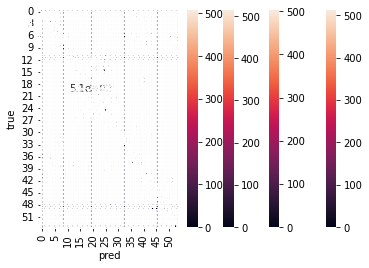

In [20]:
#ft_LGBM_results, ft_LGBM_reports = model_evaluation(ft_LGBM_models, X_test, y_test, method='LGBM')
sB_LGBM_results, sB_LGBM_reports = model_evaluation(sB_LGBM_models, X_test, y_test, method='LGBM')

In [16]:
report=kfold_report(ft_LGBM_reports, 'ft_LGBM')
print(report)

NameError: name 'ft_LGBM_reports' is not defined

In [27]:
report=kfold_report(sB_LGBM_reports, 'sB_LGBM')
print(report)

NameError: name 'sB_LGBM_reports' is not defined

In [22]:
Is = FI_LGBM(models, X)
Is[1]

,importance
year,2990
女,181
単純,500
Dvec0,1162
Dvec1,1153
...,...
P(S)vec136,238
P(S)vec137,80
P(S)vec138,194
sec_lbl,108


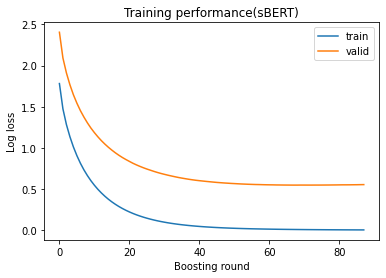

In [23]:
# 学習過程の可視化
plt.plot(train_results[0]['train']['multi_logloss'], label='train')
plt.plot(train_results[0]['valid']['multi_logloss'], label='valid')
plt.ylabel('Log loss')
plt.xlabel('Boosting round')
plt.title('Training performance(sBERT)')
plt.legend()
plt.show()

#https://potesara-tips.com/lightgbm-holdout/
#https://potesara-tips.com/lightgbm-k-fold-cross-validation/

### NN(keras) 5fold

https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=ja

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Model
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Input
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy

In [12]:
#注意: StandardScalerはtrain_featuresを使用する場合にのみ適合し、モデルが検証セットやテストセットでピークを迎えることがないようにします。
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)

X_train_ss = np.clip(X_train_ss, -5, 5)
X_test_ss = np.clip(X_test_ss, -5, 5)

In [13]:
#https://github.com/ghmagazine/kagglebook/blob/master/ch03/ch03-02-categorical.py
# target encoding - クロスバリデーションのfoldごとの場合
# クロスバリデーションのfoldごとにtarget encodingをやり直す
nn_models= []

histories = []
# 変換するカテゴリ変数をリストに格納
cat_cols = ['pos_lbl', 'sec_lbl']

class_num = 54

row_no_list = list(range(len(y_train)))

# KFoldクラスをインスタンス化（これを使って5分割する）
K_fold = StratifiedKFold(n_splits=4, shuffle=True,  random_state=0)




for train_cv_no, eval_cv_no in K_fold.split(row_no_list, y_train):
    # ilocで取り出す行を指定
    X_train_cv = pd.DataFrame(X_train_ss, columns=X_train.columns).iloc[train_cv_no, :]
    y_train_cv = pd.Series(y_train).iloc[train_cv_no]
    X_eval_cv = pd.DataFrame(X_train_ss, columns=X_train.columns).iloc[eval_cv_no, :]
    y_eval_cv = pd.Series(y_train).iloc[eval_cv_no]
    
    w_array=Add_class_wight(X_train_cv,  y_train_cv)   
    print(len(w_array), len(X_train_cv))
    

    
    # 変数をループしてtarget encoding
    for c in cat_cols:
        # 学習データ全体で各カテゴリにおけるtargetの平均を計算
        data_tmp = pd.DataFrame({c: X_train_cv[c], 'target': y_train_cv})
        target_mean = data_tmp.groupby(c)['target'].mean()
        # バリデーションデータのカテゴリを置換
        X_eval_cv.loc[:, c] = X_eval_cv[c].map(target_mean)
        
        
        # 学習データの変換後の値を格納する配列を準備
        tmp = np.repeat(np.nan, X_train_cv.shape[0])
        
        # 学習データを分割(target encording)
        kf = KFold(n_splits=4, shuffle=True, random_state=0)
        
        kf_encoding = KFold(n_splits=4, shuffle=True, random_state=0)
        for idx_1, idx_2 in kf_encoding.split(X_train_cv):
            # out-of-foldで各カテゴリにおける目的変数の平均を計算
            target_mean = data_tmp.iloc[idx_1].groupby(c)['target'].mean()
            # 変換後の値を一時配列に格納
            tmp[idx_2] = X_train_cv[c].iloc[idx_2].map(target_mean)

        X_train_cv.loc[:, c] = tmp
        
    
    model = make_nn_model(X_train, class_num)     

    early_stopping = tf.keras.callbacks.EarlyStopping( 
        verbose=1,
        patience=10,
        mode='auto',
        restore_best_weights=True)
    
    EPOCHS = 50
    BATCH_SIZE = 128
    
    history = model.fit(
        X_train_cv,
        y_train_cv,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        callbacks=[early_stopping],
        validation_data=(X_eval_cv, y_eval_cv),
        #class_weight=w_array
    )
    
    y_eval_pred = model.predict(X_eval_cv)
    histories.append(history)
    nn_models.append(model) 
    #pd.DataFrame(history.history).plot(figsize=(8,5))    

11559 11559


2022-11-22 07:41:00.734256: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-22 07:41:00.734427: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-22 07:41:00.734484: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (3ed327de65ae): /proc/driver/nvidia/version does not exist
2022-11-22 07:41:00.735364: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
91/91 [==============================] - 3s 14ms/step - loss: 1.3340 - accuracy: 0.6441 - val_loss: 7.6379 - val_accuracy: 0.2974
Epoch 2/50
91/91 [==============================] - 1s 10ms/step - loss: 0.8304 - accuracy: 0.7493 - val_loss: 1.5220 - val_accuracy: 0.6670
Epoch 3/50
91/91 [==============================] - 1s 10ms/step - loss: 0.7305 - accuracy: 0.7774 - val_loss: 0.8778 - val_accuracy: 0.7908
Epoch 4/50
91/91 [==============================] - 1s 10ms/step - loss: 0.6473 - accuracy: 0.8010 - val_loss: 0.7886 - val_accuracy: 0.8033
Epoch 5/50
91/91 [==============================] - 1s 10ms/step - loss: 0.6123 - accuracy: 0.8110 - val_loss: 0.6847 - val_accuracy: 0.8199
Epoch 6/50
91/91 [==============================] - 1s 9ms/step - loss: 0.5719 - accuracy: 0.8252 - val_loss: 0.6420 - val_accuracy: 0.8233
Epoch 7/50
91/91 [==============================] - 1s 9ms/step - loss: 0.5293 - accuracy: 0.8361 - val_loss: 0.5969 - val_accuracy: 0.8305
Epoch 8/50
91/9

### NN 結果表示のモデル選択

In [14]:
#ft_nn_models = nn_models
sB_nn_models = nn_models

In [15]:
#テスト時は学習データ全ての平均をテストデータの各ラベルに置き換える。
#cat変数の変更

cat_cols = ['pos_lbl', 'sec_lbl']

X_test = pd.DataFrame(X_test_ss, columns=X_test.columns)
y_test = pd.Series(y_test)
X_train = pd.DataFrame(X_train_ss, columns=X_train.columns)
y_train = pd.Series(y_train)
    

for c in cat_cols:
        # 学習データ全体で各カテゴリにおけるtargetの平均を計算
        data_tmp = pd.DataFrame({c: X_train[c], 'target': y_train})
        target_mean = data_tmp.groupby(c)['target'].mean()
        
        X_test.loc[:, c] = X_test[c].map(target_mean)        

121/121 [==============================] - 0s 2ms/step


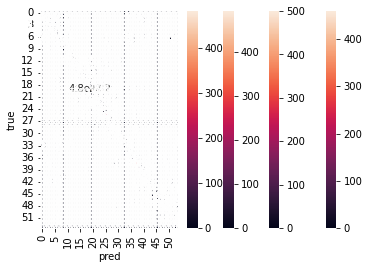

In [16]:
#ft_nn_results, ft_nn_reports = model_evaluation(ft_nn_models, X_test, y_test, method='NN')
sB_nn_results, sB_nn_reports = model_evaluation(sB_nn_models, X_test, y_test, method='NN')

In [40]:
sB_nn_results[0]

,true,pred
0,37,37
1,25,25
2,37,37
3,19,19
4,19,19
...,...,...
3849,19,19
3850,44,48
3851,25,25
3852,13,30


In [97]:
labels = np.unique(lbl_l.inverse_transform(y))
new_labels = ['lower extremity artery','general abodomen','ovary','uterus','fetus/placenta',
           'intestinal tract','bone tumor', 'bone tumor(joint)','bladder', 'mediastinum',
           'heart', 'breast', 'head/neck artery', 'dementia', 'maltiple sclerosis',
           'brainstem', 'epilepsy','jaw','orbital tumor', 'general brain',
           'optinc nerve', 'newborn brain', 'vertebral artery', 'pituitaly gland', 'brian metastasis',
           'brain tumor/encephalitis', 'vestibulocochlear', 'head/spine(newborn)', 'kidney/adrenal glad']
def confusion(result):
    true = lbl_l.inverse_transform(result['true'])
    pred = lbl_l.inverse_transform(result['pred'])
    cr = np.unique(true)
    result = pd.DataFrame(list(zip(true, pred)), columns = ['true','pred'])
    result = result.replace(labels, new_labels)

    sns.heatmap(confusion_matrix(result['true'],result['pred']), 
                annot=True, 
                yticklabels=cr,xticklabels=cr)
    plt.xlabel("pred")
    plt.ylabel('true')
    

In [100]:
confusion(a)

ValueError: Replacement lists must match in length. Expecting 54 got 29 

<AxesSubplot:>

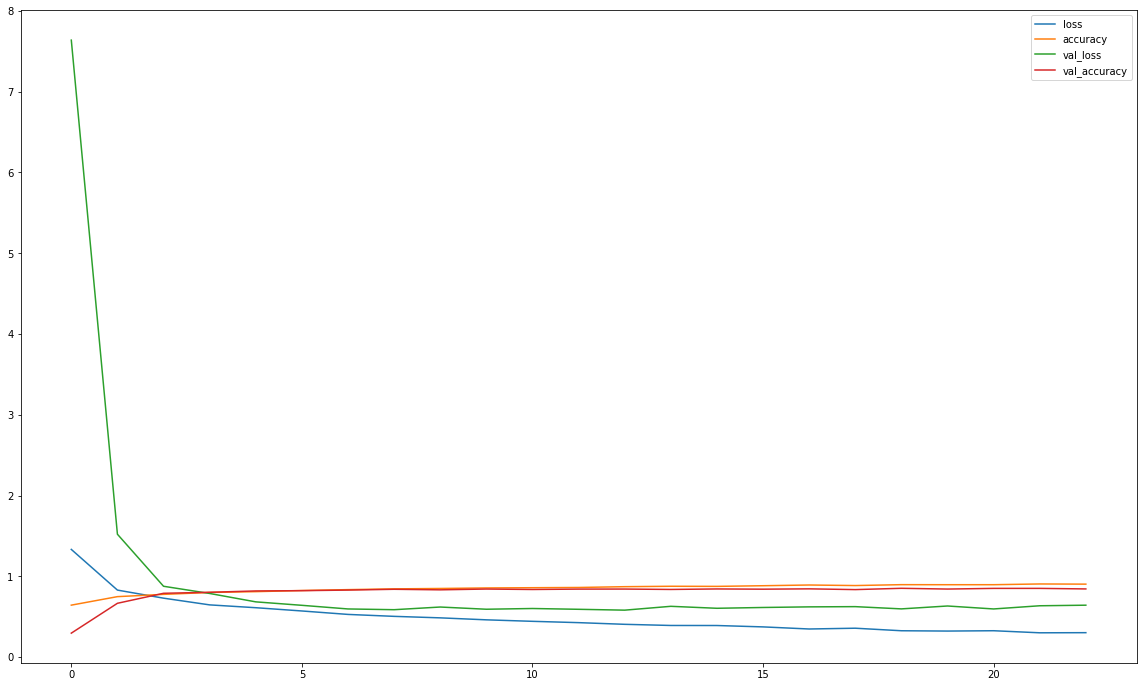

In [30]:
pd.DataFrame(histories[0].history).plot(figsize=(20,12))

In [21]:
a=kfold_report(ft_nn_reports, 'ft_NN')
a

NameError: name 'ft_nn_reports' is not defined

In [20]:
a=kfold_report(sB_nn_reports, 'sB_NN')
a

accuracy        0.830825
macro avg       0.763196
weighted avg    0.833860
dtype: float64